In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table, load_graph, accessURL

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [3]:
qid  = 'reasoning'
tbox = 'http://mynotebook:8888/files/colors.owl'
frmt = 'JSON'
body =  ''' 
        SELECT (COUNT(?w) AS ?cntWarm) (COUNT(?c) AS ?cntCold) ((?cntWarm>?cntCold) as ?moreWarmThanCold)  
        FROM NAMED WINDOW <cw> ON <http://streamhub:9292/streamhub/streams/colorstream> [RANGE PT15S STEP PT5S]
        WHERE {
            { WINDOW <cw> { ?w a <http://www.streamreasoning.org/ontologies/2018/9/colors#Warm>. } }
            UNION
            { WINDOW <cw> { ?c a <http://www.streamreasoning.org/ontologies/2018/9/colors#Cold> .} }
        }
    '''

In [4]:
reasoning1q = jasper.create(qid, body, tbox, frmt)

In [5]:
jasper.streams()

[http://jasper:8181/jasper/streams/reasoning,
 http://streamhub:9292/streamhub/streams/colorstream]

In [6]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [7]:
reasoning1_stream = reasoning1q.stream()

In [8]:
r.endpoints()

[GET http://jasper:8182/jasper/streams/reasoning/observers/1965641306]

In [9]:
endpoint = reasoning1_stream.endpoints()[0]

In [10]:
endpoint.call().flatten().dataframe()

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntCold_datatype,results_bindings_0_cntCold_type,results_bindings_0_cntCold_value,results_bindings_0_cntWarm_datatype,results_bindings_0_cntWarm_type,results_bindings_0_cntWarm_value,results_bindings_0_moreWarmThanCold_datatype,results_bindings_0_moreWarmThanCold_type,results_bindings_0_moreWarmThanCold_value
0,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,69,http://www.w3.org/2001/XMLSchema#integer,literal,71,http://www.w3.org/2001/XMLSchema#boolean,literal,true
1,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,114,http://www.w3.org/2001/XMLSchema#integer,literal,105,http://www.w3.org/2001/XMLSchema#boolean,literal,false
2,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,123,http://www.w3.org/2001/XMLSchema#integer,literal,96,http://www.w3.org/2001/XMLSchema#boolean,literal,false
3,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,113,http://www.w3.org/2001/XMLSchema#integer,literal,104,http://www.w3.org/2001/XMLSchema#boolean,literal,false
4,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,106,http://www.w3.org/2001/XMLSchema#integer,literal,105,http://www.w3.org/2001/XMLSchema#boolean,literal,false


In [11]:
df = endpoint.call().flatten().dataframe(['results_bindings_0_cntCold_value', 'results_bindings_0_cntWarm_value'])
df

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntCold_datatype,results_bindings_0_cntCold_type,results_bindings_0_cntCold_value,results_bindings_0_cntWarm_datatype,results_bindings_0_cntWarm_type,results_bindings_0_cntWarm_value,results_bindings_0_moreWarmThanCold_datatype,results_bindings_0_moreWarmThanCold_type,results_bindings_0_moreWarmThanCold_value
0,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,114,http://www.w3.org/2001/XMLSchema#integer,literal,105,http://www.w3.org/2001/XMLSchema#boolean,literal,false
1,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,123,http://www.w3.org/2001/XMLSchema#integer,literal,96,http://www.w3.org/2001/XMLSchema#boolean,literal,false
2,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,113,http://www.w3.org/2001/XMLSchema#integer,literal,104,http://www.w3.org/2001/XMLSchema#boolean,literal,false
3,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,106,http://www.w3.org/2001/XMLSchema#integer,literal,105,http://www.w3.org/2001/XMLSchema#boolean,literal,false
4,cntWarm,cntCold,moreWarmThanCold,http://www.w3.org/2001/XMLSchema#integer,literal,124,http://www.w3.org/2001/XMLSchema#integer,literal,108,http://www.w3.org/2001/XMLSchema#boolean,literal,false


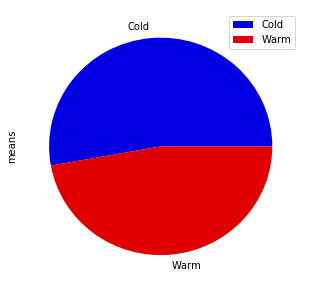

In [12]:
%matplotlib inline
import pandas as pd

df1 = df[['results_bindings_0_cntCold_value','results_bindings_0_cntWarm_value']]
cntg_mean = df1['results_bindings_0_cntCold_value'].mean()
cntr_mean = df1['results_bindings_0_cntWarm_value'].mean()

df = pd.DataFrame({'means': [cntg_mean, cntr_mean]}, index=['Cold', 'Warm'])
plot = df.plot.pie(y='means', colors=["#0000e1", "#e10000"], figsize=(5, 5))

In [13]:
jasper.delete(qid)

{
    "@id": "queries/reasoning",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/reasoning"
    },
    "prov:uses": {
        "@id": "http://streamhub:9292/streamhub/streams/colorstream"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}